In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')


In [30]:
# Загрузка данных
data = pd.read_csv('data/tovar_moving.csv', parse_dates=['date'], index_col='date')


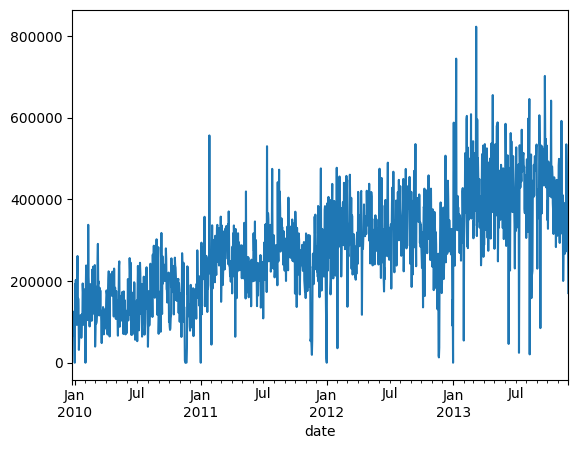

Прогноз с помощью экспоненциального сглаживания: 225015.5226471296
Фактическое значение: 423846.0
Статистика теста Дики-Фуллера: -2.2553026410338006
P-value: 0.1867890312341643
Критические значения: {'1%': -3.434973278556316, '5%': -2.8635818545830376, '10%': -2.567857072940785}


In [31]:
# 1. Отложим в test последнее значение временного ряда
test_value = data['qty'].iloc[-1]
train = data.iloc[:-1]

# 2. Анализ временного ряда на наличие тренда и сезонности
train['qty'].plot()
plt.show()

# 3. Прогноз с помощью экспоненциального сглаживания (alpha=0.7)
fit = SimpleExpSmoothing(train['qty']).fit(smoothing_level=0.7)
forecast = fit.forecast(1)
print(f"Прогноз с помощью экспоненциального сглаживания: {forecast.iloc[0]}")
print(f"Фактическое значение: {test_value}")

# 4. Проверка на стационарность и определение порядка интегрирования
result = adfuller(train['qty'])
print(f"Статистика теста Дики-Фуллера: {result[0]}")
print(f"P-value: {result[1]}")
print(f"Критические значения: {result[4]}")

Если p-value < 0.05, то ряд стационарен, иначе нестационарен
Порядок интегрирования определяется количеством differencing операций, необходимых для стационаризации

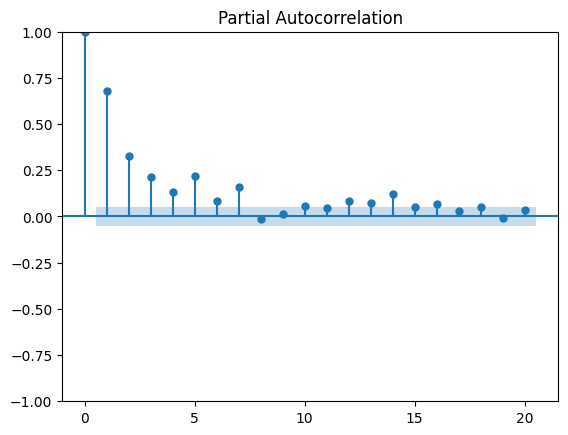

In [32]:
# 5. Определение порядка модели AR по графику частичной автокорреляции
plot_pacf(train['qty'], lags=20)
plt.show()

По графику можно определить порядок AR

In [33]:
# 6. Построение модели AR и прогноз последнего значения
model = AutoReg(train['qty'], lags=7)
model_fit = model.fit()
forecast = model_fit.forecast(steps=1)
print(f"Прогноз с помощью модели AR: {forecast.iloc[0]}")

# 7. Сравнение результатов
print(f"Фактическое значение: {test_value}")

Прогноз с помощью модели AR: 345269.6053838954
Фактическое значение: 423846.0
